In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.5)

**************************************************

Testing param sweep -- parcel wp

**************************************************

In [24]:
df = pd.read_csv("testing_loops.csv")
df['NRecovered'] = df['FracRecovered']*df['NStaff']
df['NInfected'] = df['NRecovered']-1
df.columns

Index(['Group', 'NStaff', 'Iteration', 'FracRecovered',
       'TotInfPackagesDelivered', 'FomiteInfectionFrac',
       'NetworkInfectionFrac', 'ContactInfectionFrac', 'PairInfectionFrac',
       'RoomInfectionFrac', 'ExtIntroFrac', 'CustIntroFrac',
       'CustomersInfectedByPkg', 'CustomersInfectedByDrivers', 'IsolatorsFrac',
       'SympIsolatorsFrac', 'FPIsolatorsFrac', 'TPSympIsolatorsFrac',
       'TPAsympIsolatorsFrac', 'IndexCaseInfections', 'IndexCaseViralLoad',
       'IndexCaseInfectivity', 'OverallOutbreakLength', 'Dtime', 'protocol',
       'tperiod', 'specificity', 'Ltime', 'new_comply_prob', 'tD', 'SimType',
       'PkgHlife', 'p_friend_contact', 'phi', 'InfInit', 'delay', 'Pisol',
       'p_contact', 'p_fomite_contr', 'test_pause', 'p_fomite_trans',
       'NRecovered', 'NInfected'],
      dtype='object')

In [27]:
TProtos = np.unique(df["protocol"])
Delays = np.unique(df["delay"])
NCP = np.unique(df["new_comply_prob"])
Tperiod = np.unique(df["tperiod"])

print('II = ', np.unique(df["InfInit"]))
print('TD = ', np.unique(df["tD"]))
print('Phi = ', np.unique(df['phi']))
print('Pisol = ', np.unique(df['Pisol']))
print('Specificity = ', np.unique(df['specificity']))
print('Random contact rate = ', np.unique(df['p_contact']))
print('Friend contact prob = ', np.unique(df['p_friend_contact']))
print('Staff totals = ', np.unique(df['NStaff']))


II =  [0]
TD =  [0.25]
Phi =  [0.05]
Pisol =  [0.5]
Specificity =  [0.999]
Random contact rate =  [0.02941176]
Friend contact prob =  [1.]
Staff totals =  [10 20 38 68]


need likewise no testing case

In [28]:
dfall = df.loc[df['Group']=='All',:]
dfall['outbreak'] = (dfall['NRecovered'] > 5)
dfall['scenario'] = np.zeros(len(dfall),dtype=np.object)
dfall.loc[lambda df: (df["protocol"]=='LFD_mass_testing'),'scenario'] = "LFD"
dfall.loc[lambda df: (df["protocol"]=='PCR_mass_testing') &\
                     (df["delay"]==0),'scenario'] = "PCR -- 0 delay"
dfall.loc[lambda df: (df["protocol"]=='PCR_mass_testing') &\
                     (df["delay"]==1),'scenario'] = "PCR -- 1 day delay"
dfall.loc[lambda df: (df["protocol"]=='PCR_mass_testing') &\
                     (df["delay"]==2),'scenario'] = "PCR -- 2 day delay"

print(sum(dfall['scenario'] == "LFD"))
print(sum(dfall['scenario'] == "PCR -- 0 delay"))
print(sum(dfall['scenario'] == "PCR -- 1 day delay"))
print(sum(dfall['scenario'] == "PCR -- 2 day delay"))


/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

210000
210000
210000
210000


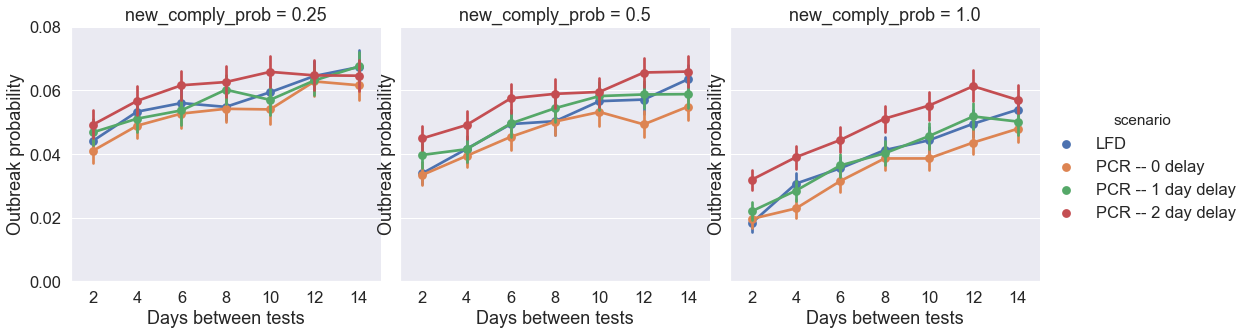

In [29]:
sp = sns.catplot(x="tperiod", y="outbreak",hue='scenario',col='new_comply_prob',data=dfall,kind='point')
sp.set(xlabel='Days between tests', ylabel='Outbreak probability',ylim=(0,0.08))

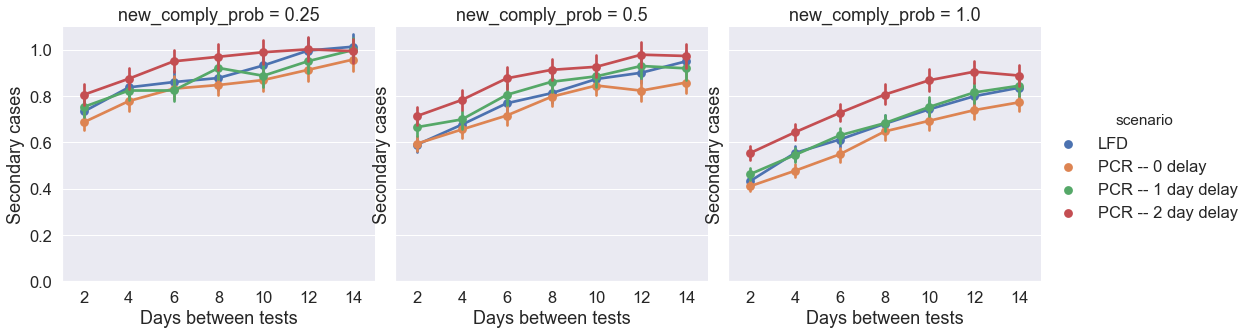

In [32]:
sp = sns.catplot(x="tperiod", y="NInfected",hue='scenario',col='new_comply_prob',data=dfall,kind='point')
sp.set(xlabel='Days between tests', ylabel='Secondary cases',ylim=(0,1.1))

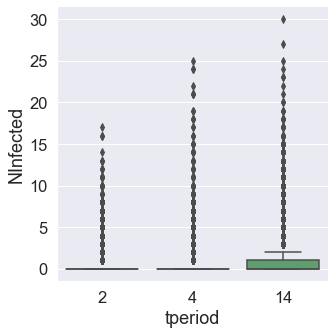

In [34]:
dfNCP1 = dfall.loc[lambda DF: (DF['scenario'] == 'LFD') & \
           ((DF['tperiod']==2) | (DF['tperiod']==4) | (DF['tperiod']==7) | (DF['tperiod']==14)) &
           (DF['new_comply_prob']==1)]
sp = sns.catplot(x="tperiod", y="NInfected", data=dfNCP1, kind='box')